# Text calculator

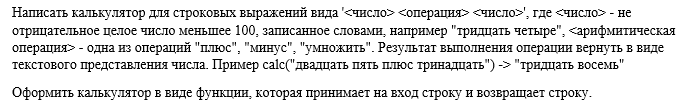

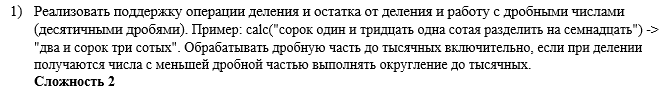

In [1]:
def an(first, op, second): #Функция, выполняющая операции
    if op == '+': return first + second
    if op == '-': return first - second
    if op == '*': return round(first * second, 3)
    if op == '/': return round(first / second, 3)
    if op == '%': return first % second

def translate(word): #Функция перевода слов в числа
    tr = {'плюс': '+', 'минус': '-', 'умножить': '*', 'делить': '/', 'и': '.', 'ноль': 0, 'один': 1, 'одна': 1,
          'десять': 10, 'сто': 100, 'два': 2, 'две': 2, 'двадцать': 20, 'двести': 200, 'три': 3, 'тридцать': 30,
          'триста': 300, 'четыре': 4, 'сорок': 40, 'четыреста': 400, 'пять': 5, 'пятьдесят': 50, 'пятьсот': 500,
          'шесть': 6, 'шестьдесят': 60, 'шестьсот': 600, 'семь': 7, 'семьдесят': 70, 'семьсот': 700, 'восемь': 8,
          'восемьдесят': 80, 'восемьсот': 800, 'девять': 9, 'девяносто': 90, 'девятьсот': 900, 'одиннадцать': 11,
          'двенадцать': 12, 'тринадцать': 13, 'четырнадцать': 14, 'пятнадцать': 15, 'шестнадцать': 16, 'семнадцать': 17,
          'восемнадцать': 18, 'девятнадцать': 19, 'десятых': '|', 'десятая': '|', 'сотых': '||', 'сотая': '||',
          'тысячных': '|||', 'тысячная': '|||', 'остаток': '%'}
    return tr[word]


def tcat(num): #Функция перевода слов в числа для 1-19
    ab = {'0': 'ноль ', '1': 'один ', '2': 'два ', '3': 'три ', '4': 'четыре ', '5': 'пять ',
          '6': 'шесть ', '7': 'семь ', '8': 'восемь ', '9': 'девять ', '10': 'десять ', '11': 'одиннадцать ',
          '12': 'двенадцать ', '13': 'тринадцать ', '14': 'четырнадцать ', '15': 'пятнадцать ', '16': 'шестнадцать ',
          '17': 'семнадцать ', '18': 'восемнадцать ', '19': 'девятнадцать '}
    num = str(num)
    return ab[num]

def summ(mas): #Вспомогательная функция для перевода слов в числа
    w_p = 0
    if '.' in mas: point = 'yes'
    else: point = 'no'
    if '|' in mas or '||' in mas or '|||' in mas: type = 'fractional'
    else: type = 'whole'

    if type == 'whole':
        for i in mas: w_p += i
        return float(w_p)
    f_p = 0
    j = 0
    if type == 'fractional' and point == 'yes':
        while mas[j] != '.':
            w_p += mas[j]
            j += 1
        j += 1
        while mas[j] not in ('|', '||', '|||'):
            f_p += int(mas[j])
            j += 1
    if type == 'fractional' and point == 'no':
        while mas[j] not in ('|', '||', '|||'):
            f_p += int(mas[j])
            j += 1

    f_p = str(f_p)
    f_p = '0'*(len(mas[j]) - len(f_p)) + f_p
    chis = float(str(w_p)+'.'+f_p)
    return chis


def btt(num): #Функция перевода числа обратно в текстовый вид
    c = {'20': 'двадцать ', '30': 'тридцать ', '40': 'сорок ', '50': 'пятьдесят ', '60': 'шестьдесят ',
         '70': 'семьдесят ', '80': 'восемьдесят ', '90': 'девяносто '}
    d = {'100': 'сто ', '200': 'двести ', '300': 'триста ', '400': 'четыреста ', '500': 'пятьсот ', '600': 'шестьсот ',
         '700': 'семьсот ', '800': 'восемьсот ', '900': 'девятьсот '}
    e = {'1000': 'одна тысяча ', '2000': 'две тысячи ', '3000': 'три тысячи ', '4000': 'четыре тысячи ',
         '5000': 'пять тысяч ', '6000': 'шесть тысяч ', '7000': 'семь тысяч ', '8000': 'восемь тысяч ',
         '9000': 'девять тысяч '}
    f = {'1': 'десятых', '2': 'сотых', '3': 'тысячных'}
    h = {'1': 'десятая', '2': 'сотая', '3': 'тысячная'}
    g = {'1': 'тысяча ', '2-4': 'тысячи ', '5-99': 'тысяч '}
    f_p = str(round(num % 1, 3))[2:]
    num = int(num // 1)
    sm = str(len(f_p))
    if f_p != '0': f_p = btt(float(f_p))
    osm = f[sm]
    if f_p[-5:] == 'один ':
        f_p = f_p.replace('один ', 'одна ')
        osm = h[sm]
    if f_p[-4:] == 'два ':
        f_p = f_p.replace('два ', 'две ')
    neg = 0
    if num < 0:
        neg = 1
        num *= -1
    if num == 0 and f_p != 0:
        return f_p + osm

    if 0 <= num < 20:
        return ('минус ' if neg == 1 else '') + tcat(num) + ('и ' + f_p + osm if f_p != '0' else '')

    if 20 <= num < 100:
        first = c[str(num - num % 10)]
        t = num % 10
        if t: second = tcat(t)
        else: second = ''
        return ('минус ' if neg == 1 else '') + first + second + ('и ' + f_p + osm if f_p != '0' else '')

    if 100 <= num < 1000:
        first = d[str(num - num % 100)]
        t = num % 100
        if t < 20:
            if t: second = tcat(t)
            else: second = ''
            third = ''
        else:
            second = c[str(t - t % 10)]
            if t % 10: third = tcat(t % 10)
            else: third = ''
        return ('минус ' if neg == 1 else '') + first + second + third + ('и ' + f_p + osm if f_p != '0' else '')

    if 1000 <= num < 100000:
        if 0 <= num // 1000 < 20:
            dt = ''
            tt = tcat(num // 1000)
            if num // 1000 == 1: ths = g['1']
            if num // 1000 in (2, 3, 4): ths = g['2-4']
            if num // 1000 not in (1, 2, 3, 4): ths = g['5-99']

        else:
            dt = c[str((num // 1000) - (num // 1000) % 10)]
            tt = tcat((num // 1000) % 10)
            ths = g['5-99']
        if tt == 'один ': tt = 'одна '
        if tt == 'два ': tt == 'две '
        first = dt + tt + ths
        sec = num % 1000
        if sec - sec % 100: second = d[str(sec - sec % 100)]
        else: second = ''
        t = sec % 100
        if t < 20:
            if t: third = tcat(t)
            else: third = ''
            fourth = ''
        else:
            third = c[str(t - t % 10)]
            if t % 10: fourth = tcat(t % 10)
            else: fourth = ''
        return ('минус ' if neg == 1 else '') + first + second + third + fourth + ('и ' + f_p + osm if f_p != '0' else '')


def calc(str): #Основное тело калькулятора
    mas = str.split()
    mas = list(map(translate, mas))
    first = []
    second = []
    i = 0
    while mas[i] not in ('+', '-', '*', '/', '%'):
        first.append(mas[i])
        i+=1
    op = mas[i]
    i+=1
    for j in range(i, len(mas)):
        second.append(mas[j])
    return an(summ(first), op, summ(second))

def body(): #Функция для работы с ошибками
    try:
        print(btt(calc(input('Введите выражение:\n'))))
    except:
        print('Ввод некорректен, повторите попытку')
        body()

print('Возможные операции:\nплюс\nминус\nумножить\nделить\nостаток')
body()


Возможные операции:
плюс
минус
умножить
делить
остаток
Введите выражение:
пять плюс два
семь 
